# 최근접 이웃(K-Nearest Neighbor)
1. New Data와 모든 Train Set사이의 거리 측정
2. 유클리드 거리가 가까운 순으로 K개의 점을 이웃으로 갖는다.
3. K의 개의 점들중 가장 많이 속한 Class 를 찾는다.
4. NewData를 새로운 Class 에 할당한다.

## K 란 ?
- 이웃의 or 주변 데이터의 개수
- K 는 홀수로 설정 하는걸 추전
- K 값이 너무 작은경우 : 민감도가 높아서 잘못 예측할 확률이 높아짐 (overfitting)
- K 값이 너무 큰경우 : 분류나 예측 자체가 둔감해지기 때문에 결과가 좋지 않음 (underfitting)
- 기본값을 이용해 적절하게 찾아 나간다.(default=5)

## P_value
- 이웃 선택의 기준이 되는 거리 계산법
- Minkowski 거리법을 사용한다. 

## 주의
- 변수 값 범위 재조정
    - 각 feature 의 단위가 다르기 때문에 거리 측정시에 범위를 재조정 해줘야 한다.
    - 물렁도, 크기의 단위는 서로 다르기 때문에 같은 거리 측정 방식을 사용하면 안된다.

[모델 종류]
- KNeighborsClassifier() : Classification model
    - [참고](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn-neighbors-kneighborsclassifier)
- KNeighborsRegressor : Regression Model
    - [참고](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor)

# KNeighborsClassifier() : Classification model
- n_neighbors : int
    - 이웃의 수인 K를 결정한다. default = 5 
- weights : {'uniform', 'distance'} or callable
    - 예측에 사용되는 가중 방법을 결정한다. default는 uniform이다. 
    - 'uniform' : 각각의 이웃이 모두 동일한 가중치를 갖는다. 
    - 'distance' : 거리가 가까울수록 더 높은 가중치를 가져 더 큰 영향을 미치게 된다.
    - callable : 사용자가 직접 정의한 함수를 사용할 수도 있다. 거리가 저장된 배열을 입력으로 받고 가중치가 저장된 배열을 반환하는 함수가 되어야 한다. 
-  algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'} 
    - 가장 가까운 이웃들을 계산하는 데 사용하는 알고리즘을 결정한다. default는 auto이다. 
    - 'auto' : 입력된 훈련 데이터에 기반하여 가장 적절한 알고리즘을 사용한다. 
    - 'ball_tree' : Ball-Tree 구조를 사용한다. (Ball-Tree 설명 : https://nobilitycat.tistory.com/entry/ball-tree)
    - 'kd_tree' : KD-Tree 구조를 사용한다.
    - 'brute' : Brute-Force 탐색을 사용한다. 
- leaf_size : int
    - Ball-Tree나 KD-Tree의 leaf size를 결정한다. default값은 30이다.
    - 이는 트리를 저장하기 위한 메모리뿐만 아니라, 트리의 구성과 쿼리 처리의 속도에도 영향을 미친다. 
- p : int
    - 민코프스키 미터법(Minkowski)의 차수를 결정한다. 예를 들어 p = 1이면 맨해튼 거리(Manhatten distance), p = 2이면 유클리드 거리(Euclidean distance)이다. 

In [1]:
# !pip install threadpoolctl==3.1.0
# !pip install lazypredict
# AttributeError: 'NoneType' object has no attribute 'split' 에러 발생시

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE

In [3]:
import warnings
warnings.filterwarnings("ignore")

## K 최근접 이웃 분류
- 학습 과정 : Train Data Set을 저장
- k개의 데이터중 거리를 기준으로 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [4]:
iris = load_iris()

In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [7]:
scaler = StandardScaler()
# minmaxscaler와의 차이는?
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [8]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
# scale 안한거
print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9666666666666667
Test Data Score: 1.0


In [9]:
model = KNeighborsClassifier()
model.fit(x_train_scale, y_train)
 # scale한거
print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.9583333333333334
Test Data Score: 1.0


In [12]:
cross_validate(estimator = KNeighborsClassifier(), 
               X=x, y=y, cv=5, 
            #    n_jobs=multiprocessing.cpu_count()
               )

{'fit_time': array([0.00048709, 0.00040722, 0.00027609, 0.00025511, 0.00026631]),
 'score_time': array([0.0034771 , 0.00106001, 0.00093102, 0.00212693, 0.00089502]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [13]:
param_grid = [{'n_neighbors':[3,5,7],
               'weights': ['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [14]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    # n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

In [15]:
gs.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [18]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [19]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.9800000000000001


In [20]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out

In [21]:
# 2차원으로 차원축소후 KNeighborsClassifier 를 이용해 학습 결과를 확인해 보자. 
tsne = TSNE(n_components=2) 
x_comp = tsne.fit_transform(x)

In [22]:
iris_comp_df = pd.DataFrame(data=x_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,23.558636,-9.316188,0
1,26.109629,-8.201735,0
2,26.267326,-9.419456,0
3,26.610096,-9.118205,0
4,23.591774,-9.806949,0
...,...,...,...
145,-18.738968,1.120416,2
146,-16.138302,3.060170,2
147,-17.980251,1.638019,2
148,-19.116726,0.206446,2


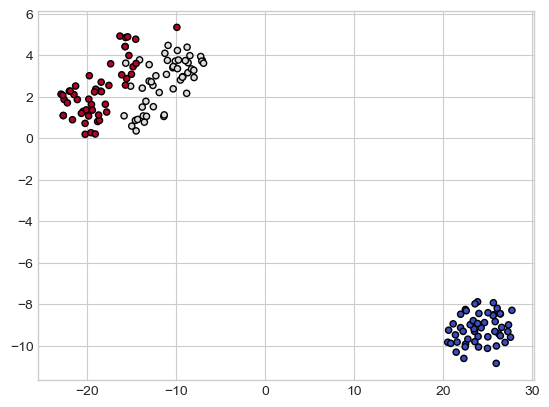

In [24]:
plt.scatter(x_comp[:, 0], x_comp[:, 1],
            c=y, 
            cmap = plt.cm.coolwarm,
            s=20, edgecolors='k')

In [25]:
# 2차원 데이터로 학습
model = KNeighborsClassifier()
model.fit(x_comp, y)
predict = model.predict(x_comp)

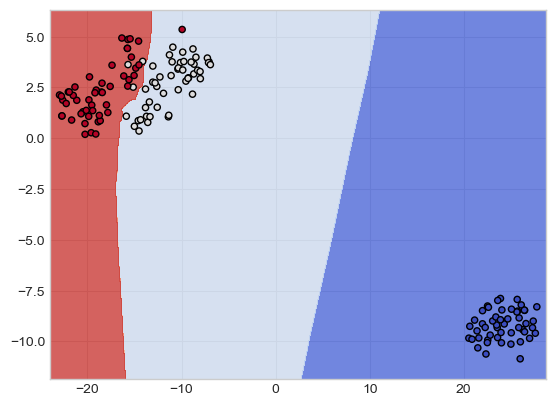

In [26]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 유방암 데이터

In [27]:
cancer = load_breast_cancer()

In [28]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [29]:
x, y =cancer.data, cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9802197802197802
Test Data Score: 0.9385964912280702


In [33]:
cross_validate(estimator = KNeighborsClassifier(), 
               X=x_train, y=y_train, cv=5, 
            #    n_jobs=multiprocessing.cpu_count()
               )

{'fit_time': array([0.00036001, 0.0004189 , 0.00027418, 0.00025702, 0.00030613]),
 'score_time': array([0.00419092, 0.00300097, 0.00260401, 0.0034101 , 0.00362682]),
 'test_score': array([0.97802198, 0.96703297, 0.96703297, 0.94505495, 0.96703297])}

In [34]:
param_grid = [{'n_neighbors':[3,5,7], # k 값  neighbors의 값 설정
               'weights': ['uniform', 'distance'], # 가중치 설정 uniform: 동일 가중치, distance 거리에 반비례하여 가중 
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}] # 자동이 아니라 종류별 알고리즘 테스트
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    # n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

In [35]:
gs.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [36]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', weights='distance')

In [37]:
gs.best_estimator_.n_neighbors

5

In [38]:
tsne = TSNE(n_components=2)
x_comp = tsne.fit_transform(x_train)

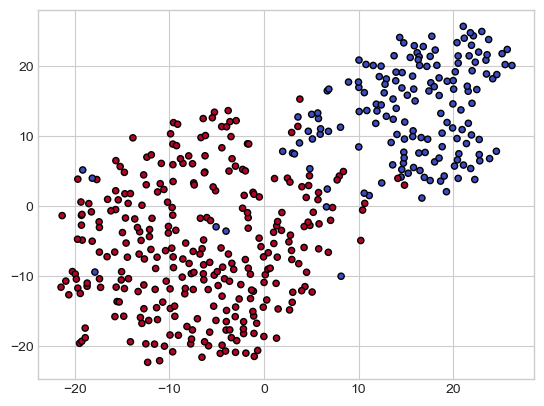

In [39]:
plt.scatter(x_comp[:, 0], x_comp[:, 1],
            c=y_train, 
            cmap = plt.cm.coolwarm,
            s=20, edgecolors='k')

In [40]:
model = gs.best_estimator_
model.fit(x_comp,y_train)
predict = model.predict(x_comp)

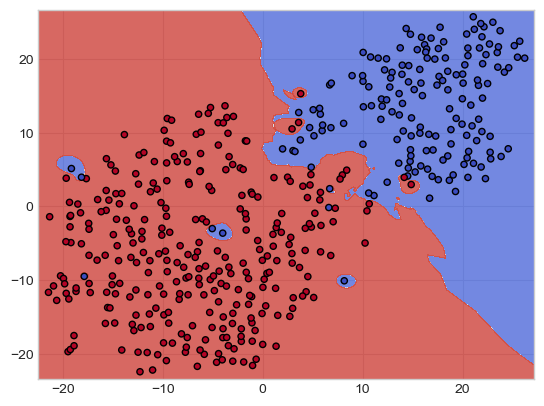

In [41]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=predict, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 와인 데이터

In [42]:
wine = load_wine()

In [43]:
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [46]:
wine_df['target'].unique()

array([0, 1, 2])

In [47]:
x, y = wine.data, wine.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [48]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [49]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.9859154929577465
Test Data Score: 0.9444444444444444


In [50]:
cross_validate(estimator = KNeighborsClassifier(), 
               X=x_train, y=y_train, cv=5, 
            #    n_jobs=multiprocessing.cpu_count()
               )

{'fit_time': array([0.00067616, 0.00038123, 0.00029182, 0.00035095, 0.00027895]),
 'score_time': array([0.0019269 , 0.00103784, 0.00115085, 0.00094414, 0.00090003]),
 'test_score': array([0.96551724, 1.        , 1.        , 0.96428571, 0.96428571])}

In [51]:
param_grid = [{'n_neighbors':[3,5,7], # k 값  neighbors의 값 설정
               'weights': ['uniform', 'distance'], # 가중치 설정 uniform: 동일 가중치, distance 거리에 반비례하여 가중 
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}] # 자동이 아니라 종류별 알고리즘 테스트

In [52]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    # n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

In [53]:
gs.fit(x,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [54]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')

In [55]:
tsne = TSNE(n_components=2)
x_comp = tsne.fit_transform(x_train)

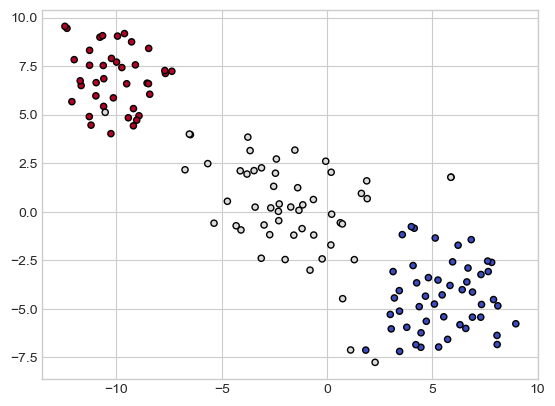

In [56]:
plt.scatter(x_comp[:, 0], x_comp[:, 1],
            c=y_train, 
            cmap = plt.cm.coolwarm,
            s=20, edgecolors='k')

In [57]:
# 2차원 데이터로 학습
model = gs.best_estimator_
model.fit(x_comp, y_train)
predict = model.predict(x_comp)

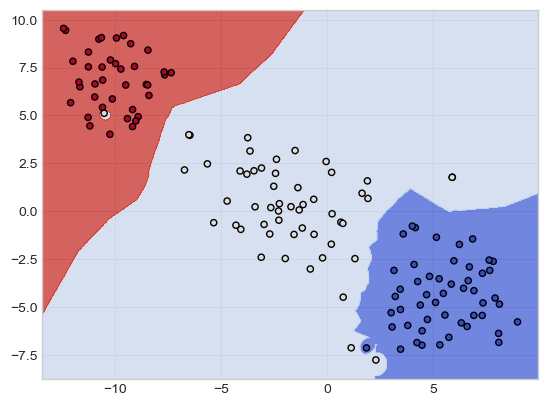

In [58]:
xx, yy = make_meshgrid(x_comp[:, 0], x_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=.8)
plt.scatter(x_comp[:, 0], x_comp[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

## k 최근접 이웃 회귀

- 주변데이터의 평균을 이용해 예측값을 결정
- 데이터 범위 밖의 새로운 데이터는 예측 불가능

### 보스턴 주택 가격 데이터

In [59]:
boston = load_boston()

In [60]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
x, y = boston.data, boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [63]:
boston_train_df = pd.DataFrame(x_train, columns = boston.feature_names)
boston_train_df['TARGET'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
1,4.22239,0.0,18.10,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64,16.8
2,0.12579,45.0,3.44,0.0,0.437,6.556,29.1,4.5667,5.0,398.0,15.2,382.84,4.56,29.8
3,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
4,0.01965,80.0,1.76,0.0,0.385,6.230,31.5,9.0892,1.0,241.0,18.2,341.60,12.93,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.11027,25.0,5.13,0.0,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73,22.2
400,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16,22.9
401,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
402,0.78570,20.0,3.97,0.0,0.647,7.014,84.6,2.1329,5.0,264.0,13.0,384.07,14.79,30.7


In [64]:
boston_test_df = pd.DataFrame(data=x_test, columns = boston.feature_names)
boston_test_df['TARGET'] = y_test
boston_test_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.06162,0.0,4.39,0.0,0.442,5.898,52.3,8.0136,3.0,352.0,18.8,364.61,12.67,17.2
1,0.12932,0.0,13.92,0.0,0.437,6.678,31.1,5.9604,4.0,289.0,16.0,396.90,6.27,28.6
2,0.10008,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3.0,193.0,17.8,396.90,5.68,32.5
3,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7
4,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5.0,398.0,15.2,377.68,5.10,37.0


In [65]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [66]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.6994827255584803
Test Data Score: 0.5205137930325885


In [67]:
model = KNeighborsRegressor()
model.fit(x_train_scale, y_train)

print(f'Train Data Score: {model.score(x_train_scale, y_train)}')
print(f'Test Data Score: {model.score(x_test_scale, y_test)}')

Train Data Score: 0.8348967277882311
Test Data Score: 0.7349688781558519


In [68]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [69]:
cross_validate(
    estimator = estimator,
    X=x, y=y,
    cv=5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    4.1s remaining:    6.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    4.1s finished


{'fit_time': array([0.00117612, 0.0012207 , 0.00120091, 0.0012188 , 0.00117874]),
 'score_time': array([0.0012188 , 0.00121307, 0.00117278, 0.00118399, 0.00104022]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [70]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

In [71]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [72]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [73]:
gs.fit(x, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [74]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [75]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.4973060611762845


In [76]:
tsne = TSNE(n_components=1)
x_comp = tsne.fit_transform(x)

In [77]:
boston_comp_df = pd.DataFrame(data=x_comp)
boston_comp_df['target']=y
boston_comp_df.head()

,0,target
0,-25.059240,24.0
1,-47.307343,21.6
2,-43.417427,34.7
3,-44.415085,33.4
4,-44.689632,36.2


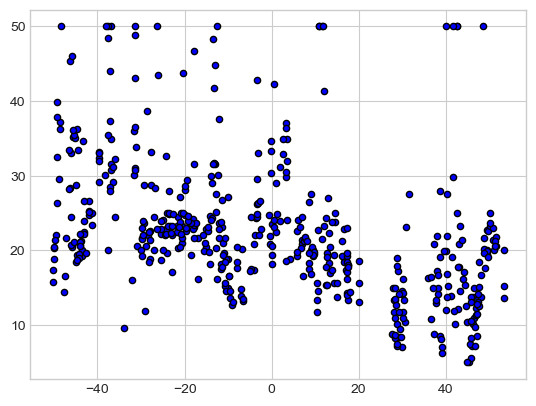

In [78]:
plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [79]:
model = gs.best_estimator_
model.fit(x_comp, y)
predict = model.predict(x_comp)

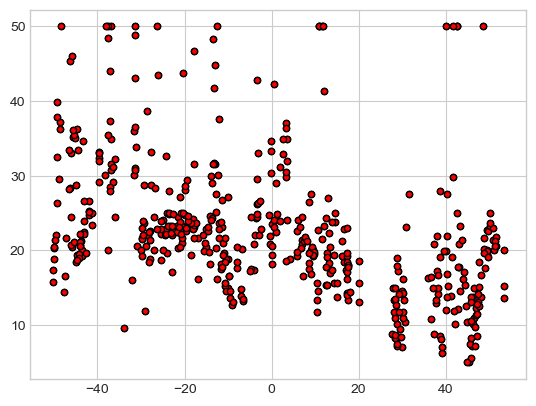

In [80]:
plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(x_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### 캘리포니아 주택 가격 데이터

In [81]:
california = fetch_california_housing()

In [82]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [83]:
x, y = california.data, california.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [84]:
california_train_df = pd.DataFrame(x_train, columns= california.feature_names)
california_train_df['TARGET'] = y_train
california_train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,2.5488,30.0,3.773171,1.063415,1700.0,4.146341,34.06,-118.11,1.875
1,3.4833,15.0,5.746154,0.976923,997.0,2.556410,33.15,-117.13,1.932
2,2.6563,29.0,3.651163,1.120930,1849.0,4.300000,33.84,-117.91,1.625
3,6.3054,14.0,7.039216,0.983193,1151.0,3.224090,33.30,-117.25,3.590
4,3.9000,36.0,5.272727,0.922078,268.0,3.480519,33.89,-118.25,1.158


In [85]:
california_test_df = pd.DataFrame(x_test, columns= california.feature_names)
california_test_df['TARGET'] = y_test
california_test_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,2.1182,34.0,4.409639,1.038554,1304.0,3.142169,37.34,-120.60,0.689
1,2.8654,52.0,5.342466,1.203957,1703.0,2.592085,37.78,-122.44,2.800
2,5.2308,33.0,5.234600,1.001311,2721.0,3.566186,37.52,-121.95,1.969
3,2.9706,36.0,4.184783,1.021739,295.0,3.206522,37.60,-122.09,1.479
4,2.7500,19.0,3.735632,0.850575,354.0,4.068966,33.93,-118.24,0.906


In [86]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [87]:
model = KNeighborsRegressor()
model.fit(x_train, y_train)

print(f'Train Data Score: {model.score(x_train, y_train)}')
print(f'Test Data Score: {model.score(x_test, y_test)}')

Train Data Score: 0.7944246085803498
Test Data Score: 0.6840488101170284


In [90]:
estimator = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [91]:
cross_validate(
    estimator = estimator,
    X=x, y=y,
    cv=5, 
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.3s finished


{'fit_time': array([0.01318192, 0.01312995, 0.01270676, 0.01288605, 0.01483893]),
 'score_time': array([0.2644701 , 0.21306491, 0.23161817, 0.29872608, 0.29042721]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [92]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', KNeighborsRegressor())])

In [93]:
param_grid = [{'model__n_neighbors': [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm':['ball_tree', 'kd_tree', 'brute']}]

In [94]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True
)

In [95]:
gs.fit(x_train,y_train) # scaler 된걸로 실행

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [96]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [97]:
print(f'GridSearchCV best score: {gs.best_score_}')

GridSearchCV best score: 0.6966106717485718


In [99]:
tsne = TSNE(n_components=1)
x_comp = tsne.fit_transform(x)

In [100]:
x.shape, x_comp.shape, y.shape

((20640, 8), (20640, 1), (20640,))

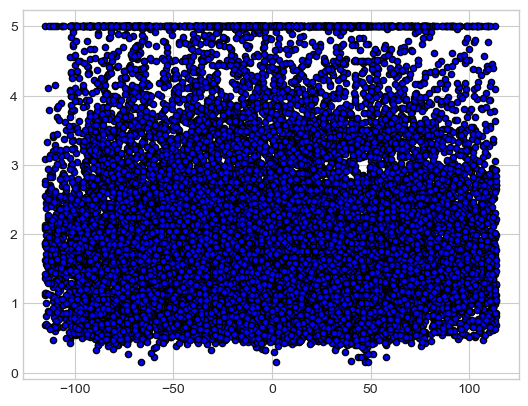

In [101]:
plt.scatter(x_comp, y, c = 'b', cmap = plt.cm.coolwarm, s=20, edgecolors='k')

In [102]:
# 가장 좋았던 모델 사용
model = gs.best_estimator_
model.fit(x_comp,y)
predict = model.predict(x_comp)

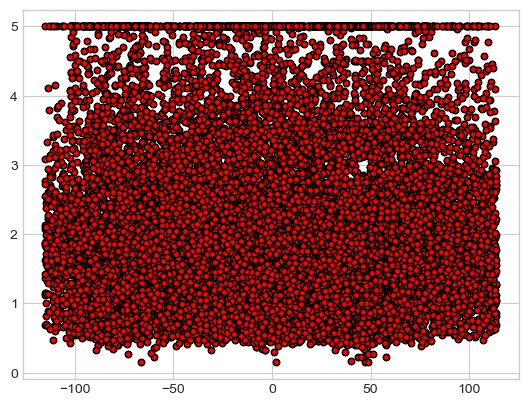

In [103]:
plt.scatter(x_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(x_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# 예측된 결과값이 기존꺼랑 거의 동일해서 빨간색으로 도배됐다...

### cf. 최적 k값 찾기(보스턴 주택 가격 데이터)

In [104]:
boston = load_boston()
x, y = boston.data, boston.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [105]:
model =KNeighborsRegressor()
model.fit(x_train, y_train)

print('scale 전 Train Data Score: {model.score(x_train, y_train)}')
print('scale 전 Test Data Score: {model.score(x_test, y_test)}')
print('-'*70)

scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

model =KNeighborsRegressor()
model.fit(x_train_scale, y_train)

print('scale 후 Train Data Score: {model.score(x_train_scale, y_train)}')
print('scale 후 Test Data Score: {model.score(x_test_scale, y_test)}')

scale 전 Train Data Score: {model.score(x_train, y_train)}
scale 전 Test Data Score: {model.score(x_test, y_test)}
----------------------------------------------------------------------
scale 후 Train Data Score: {model.score(x_train_scale, y_train)}
scale 후 Test Data Score: {model.score(x_test_scale, y_test)}


Text(0, 0.5, 'test score(accuracy)')

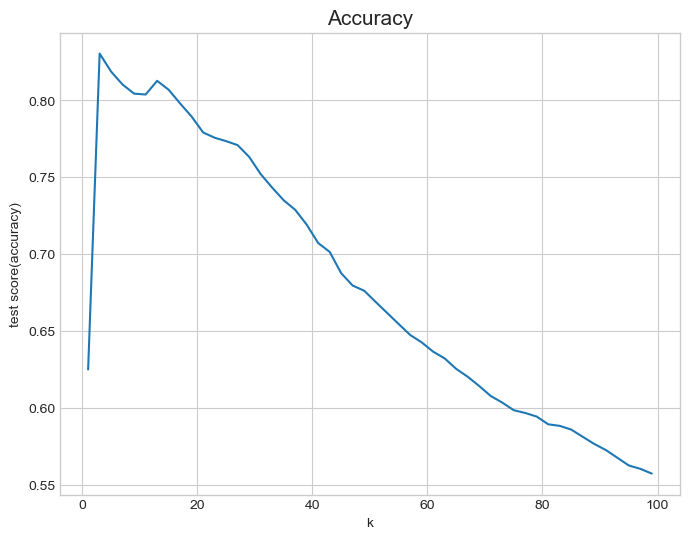

In [106]:
k_list = range(1,101, 2)
accuracies = []

for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train_scale, y_train)
    accuracies.append(model.score(x_test_scale, y_test))
    
plt.figure(figsize=(8,6))    
plt.plot(k_list, accuracies)
plt.title('Accuracy', fontsize=15)
plt.xlabel('k')
plt.ylabel('test score(accuracy)')

In [107]:
df = pd.DataFrame(k_list, accuracies).reset_index()
df.columns = ['accuracy', 'k']
df.sort_values(by='accuracy', ascending=False)

,accuracy,k
1,0.830440,3
2,0.818696,5
6,0.812717,13
3,0.810254,7
7,0.806898,15
4,0.804367,9
5,0.803803,11
8,0.797978,17
9,0.789415,19
10,0.779091,21
